# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_unique_mice = combined_data['Mouse ID'].nunique()
print(f'Number of unique mice: {num_unique_mice}')

Number of unique mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
num_unique_mice_timepoint = combined_data[['Mouse ID', 'Timepoint']].drop_duplicates().shape[0]
print(f'Number of unique mice and timepoints: {num_unique_mice_timepoint}')
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
print("Duplicate mice data:")
print(duplicate_mice)

Number of unique mice and timepoints: 1888
Duplicate mice data:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910        

In [33]:
# Optional: Get all the data for the duplicate mouse ID.



In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data.drop_duplicates(subset=['Mouse ID'], keep='first')
print("Cleaned Data:")
print(cleaned_data)

Cleaned Data:
     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0                 0  
10                 

In [5]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data['Mouse ID'].nunique()
print(num_unique_mice_cleaned)

249


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    standard_error=lambda x: st.sem(x)
).reset_index()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

  Drug Regimen  mean  median  variance  standard_deviation  standard_error
0    Capomulin  45.0    45.0       0.0                 0.0             0.0
1     Ceftamin  45.0    45.0       0.0                 0.0             0.0
2    Infubinol  45.0    45.0       0.0                 0.0             0.0
3     Ketapril  45.0    45.0       0.0                 0.0             0.0
4     Naftisol  45.0    45.0       0.0                 0.0             0.0
5      Placebo  45.0    45.0       0.0                 0.0             0.0
6     Propriva  45.0    45.0       0.0                 0.0             0.0
7     Ramicane  45.0    45.0       0.0                 0.0             0.0
8     Stelasyn  45.0    45.0       0.0                 0.0             0.0
9    Zoniferol  45.0    45.0       0.0                 0.0             0.0


In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    standard_deviation='std',
    standard_error=lambda x: st.sem(x)
).reset_index()

# Using the aggregation method, produce the same summary statistics in a single line

print(summary_stats)

  Drug Regimen  mean  median  variance  standard_deviation  standard_error
0    Capomulin  45.0    45.0       0.0                 0.0             0.0
1     Ceftamin  45.0    45.0       0.0                 0.0             0.0
2    Infubinol  45.0    45.0       0.0                 0.0             0.0
3     Ketapril  45.0    45.0       0.0                 0.0             0.0
4     Naftisol  45.0    45.0       0.0                 0.0             0.0
5      Placebo  45.0    45.0       0.0                 0.0             0.0
6     Propriva  45.0    45.0       0.0                 0.0             0.0
7     Ramicane  45.0    45.0       0.0                 0.0             0.0
8     Stelasyn  45.0    45.0       0.0                 0.0             0.0
9    Zoniferol  45.0    45.0       0.0                 0.0             0.0


## Bar and Pie Charts

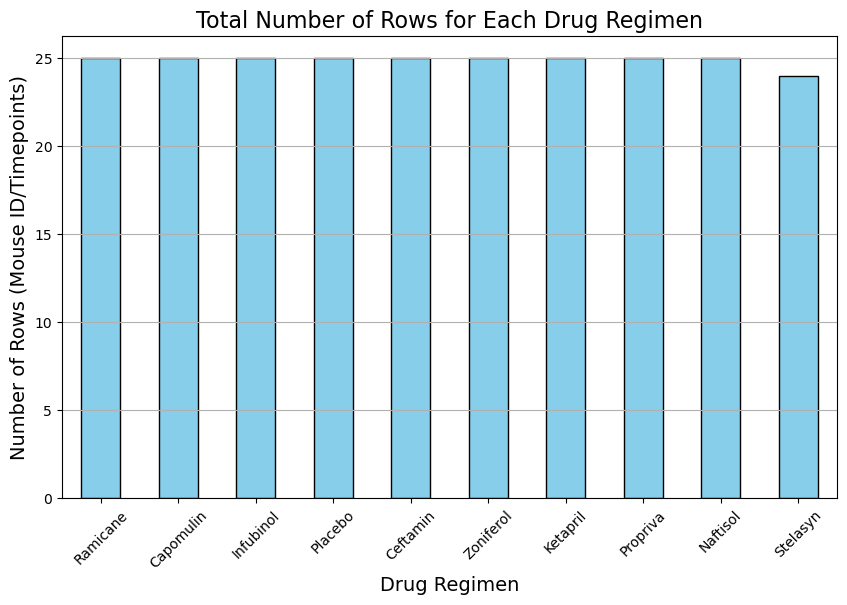

<Figure size 640x480 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_data['Drug Regimen'].value_counts()
drug_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Show the plot
plt.tight_layout()
plt.show()

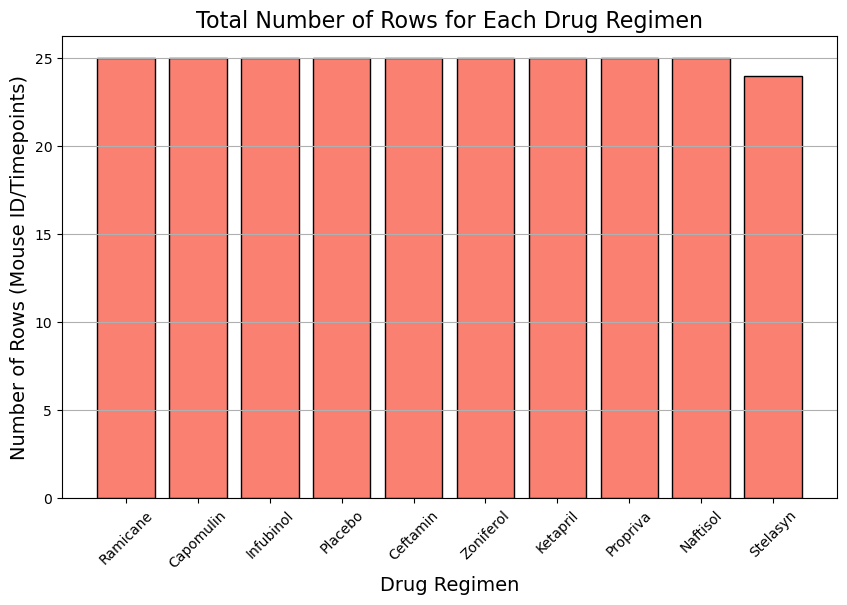

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts.values, color='salmon', edgecolor='black')
plt.title('Total Number of Rows for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Rows (Mouse ID/Timepoints)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
# Show the plot
plt.show()


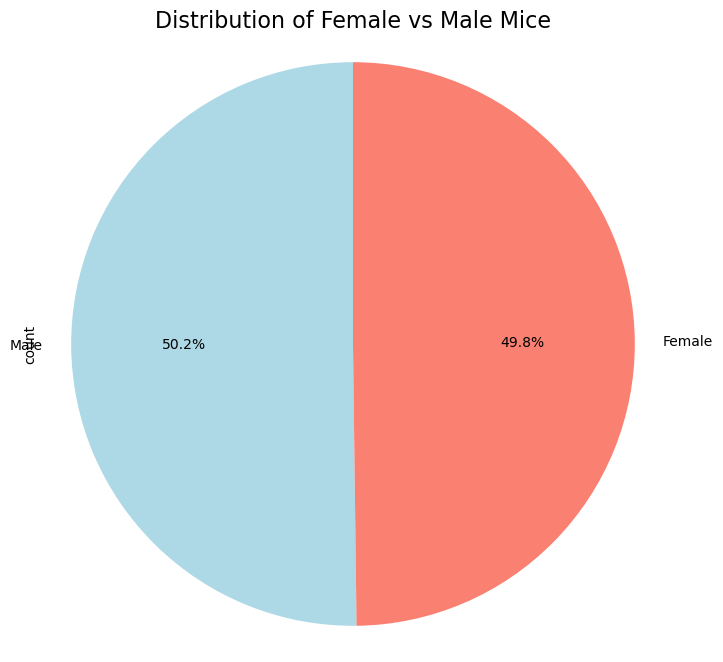

In [9]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = cleaned_data['Sex'].value_counts()

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['lightblue', 'salmon'])
plt.title('Distribution of Female vs Male Mice', fontsize=16)
plt.axis('equal')
plt.show()
# Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()



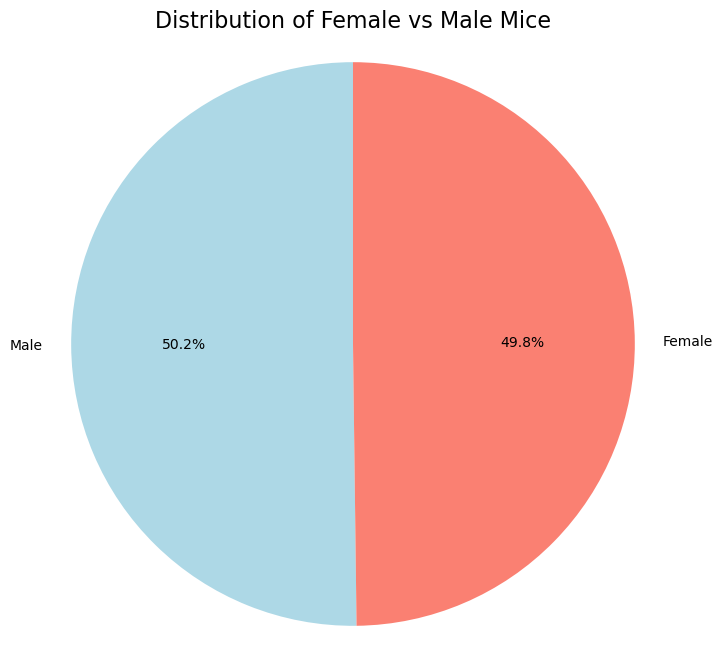

In [10]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Distribution of Female vs Male Mice', fontsize=16)
plt.axis('equal')
plt.show() 
# Get the unique mice with their gender
unique_mice = mouse_metadata[['Mouse ID', 'Sex']].drop_duplicates()



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a DataFrame to hold tumor volume data
treatment_volumes = {}

#for treatment in treatment_regimens:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby('Mouse ID').last().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_last_timepoints = pd.merge(last_timepoints, cleaned_data, on=['Mouse ID', 'Timepoint'])

#print(final_tumor_volume)
for treatment, volumes in treatment_volumes.items():
    print(f"Final_tumor_volume for {treatment}: {volumes}")

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
outliers_dict = {} 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(subset)


    # add subset
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    outliers_dict[treatment] = outliers
for treatment, outliers in outliers_dict.items():
    print(f"Outliers for {treatment}: {outliers.values}")


TypeError: list indices must be integers or slices, not str

In [13]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(
    [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments],
    labels=treatments  
)
plt.title('Distribution of Tumor Volume for Each Treatment Group', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.grid(axis='y')  
plt.show()

TypeError: list indices must be integers or slices, not str

## Line and Scatter Plots

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.figure(figsize=(10, 6))
plt.plot(time_points, tumor_volumes, marker='o', linestyle='-', color='b', label=f'Mouse ID: {mouse_id}')
plt.title(f'Tumor Volume vs Time Point for Mouse {mouse_id} (Capomulin Treatment)', fontsize=16)
plt.xlabel('Timepoint (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.xticks(time_points)  # Show all time points on the x-axis
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'time_points' is not defined

<Figure size 1000x600 with 0 Axes>

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'], color='blue', alpha=0.7)
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


NameError: name 'capomulin_weights' is not defined

<Figure size 1000x600 with 0 Axes>

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model
correlation = stats.pearsonr(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'])
correlation_coefficient = correlation[0]  
p_value = correlation[1]
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.5f}")
slope, intercept, r_value, p_value, std_err = stats.linregress(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'])

# Create regression line data
regression_line = slope * capomulin_weights['Weight (g)'] + intercept
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_weights['Weight (g)'], capomulin_weights['Tumor Volume (mm3)'], color='blue', alpha=0.7, label='Data Points')
plt.plot(capomulin_weights['Weight (g)'], regression_line, color='red', linewidth=2, label='Regression Line')
plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Treatment', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"Slope of regression line: {slope:.2f}")
print(f"Intercept of regression line: {intercept:.2f}")

NameError: name 'stats' is not defined